In [1]:
import os
import sys
import scipy.io as sio
import scipy.sparse as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
import re
import io
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

from IPython.display import clear_output

Matplotlib created a temporary cache directory at /tmp/matplotlib-m7cp2u4m because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [21]:
# outfile = './output/zoo2_gcn_l3_mwis_training.out'
# outfile = './output/zoo4_gcn_l3_mwis_training.out'
# outfile = './output/train_MWISTwinTr_l3_foo.out'

outfile_dict = {
#     'ZOO2':    './output/zoo2_gcn_l3_mwis_training.out',
#     'ZOO11':   './output/zoo4_gcn_l3_mwis_training.out',
    'Twin_cent':    './output/ER_Graph_Uniform_GEN21_test1/c_Adam_lr5e-05_drop0.0_relu_v4.out',
    'Twin_decent':    './output/ER_Graph_Uniform_GEN21_test1/d_Adam_lr5e-05_drop0.0_cons1_relu_v4.out',
#     'Twin_decent_drop0.2':    './output/ER_Graph_Uniform_GEN21_test1/d_Adam_lr1e-05_drop0.2_cons1_relu.out',
}


In [22]:
def read_out_file(outfile):
    with open(outfile) as f:
        firstline = f.readline().rstrip()
    firstline = firstline.replace(": ",":")
    firstline

    header_text = firstline.split(":")
    header = []
    for htext in header_text:
        temp = htext.replace(" ", ",", 1)
        header.append(temp.split(",")[-1])
    header = header[0:-1]

    # with open(outfile) as f:
    #     text = f.read()
    text = ''
    with open(outfile) as f:
        for line in f:
            if not "Actor loaded " in line:
                text += line
    # print(text)
    #     text = f.read()

    for item in header:
        text = text.replace(item+":", ",")
    text = text.replace(" ","")
    textIO = io.StringIO(text)
    df = pd.read_csv(textIO, names=header, header=None, index_col=0)
    df.reset_index(drop=True, inplace=True)
    
    for item in ['Actor']:
        item_index = df['Model'] == item
        df_tmp = df[item_index].reset_index(drop=True)    
        df_tmp['Best_Ratio'] = df_tmp['Test_Ratio'].cummax()

    return df_tmp

In [23]:
# for item in ['Actor']:
#     item_index = df['Model'] == item
#     df_tmp = df[item_index].reset_index(drop=True)    
#     df_tmp['Best_Ratio'] = df_tmp['Test_Ratio'].cummax()
# df_tmp

In [28]:
samples_dict = {
        'Twin_cent': 1,
        'Twin_decent': 1,    
}

label_dict = {
    'Twin_cent': 'scheduler_centralized',
    'Twin_decent': 'scheduler_distributed',
}

training_set_size=1100
# training_set_size = 5

df_mwis = pd.DataFrame([])
for key in outfile_dict:
    outfile = outfile_dict[key]
    df_tmp = read_out_file(outfile)
    df_tmp['sample'] = samples_dict[key]
    df_tmp['model'] = label_dict[key]
    df_mwis = pd.concat([df_mwis, df_tmp], axis=0, ignore_index=True)

df_mwis['calls'] = (df_mwis['Epoch']*training_set_size+df_mwis['ID'])*df_mwis['sample']
# df_mwis['calls'] = (df_mwis['Epoch']*training_set_size+df_mwis['ID']/20)*df_mwis['sample']
# df_mwis['calls'] = range(len(df_tmp))


In [29]:
# df_tmp = df_mwis[df_mwis['Model']=='Actor'].reset_index(drop=True)    
df_tmp = df_mwis.reset_index(drop=True)    

df_tmp1 = df_tmp.copy()
df_tmp2 = df_tmp.copy()
df_tmp1['ratio'] = df_tmp1['Train_Ratio']
df_tmp1['type'] = 'Training'
df_tmp2['ratio'] = df_tmp2['Test_Ratio']
df_tmp2['type'] = 'Validation'
df_tmp = pd.concat([df_tmp1,df_tmp2], axis=0, ignore_index=True)
df_tmp

,Epoch,ID,Model,Train_Ratio,Test_Ratio,Loss,Corr,L_Avg,Track,runtime,z_avg,Best_Ratio,sample,model,calls,ratio,type
0,0,100,Actor,1.0043,0.9841,-0.5000,0.3913,0.5440,1.9681,10.51,0.050,0.9841,1,scheduler_centralized,100,1.0043,Training
1,0,200,Actor,1.0132,1.0118,-0.4470,0.4261,0.4883,2.2635,12.10,0.092,1.0118,1,scheduler_centralized,200,1.0132,Training
2,0,300,Actor,1.0036,1.0061,-0.2820,0.4973,0.3588,3.5672,11.74,0.122,1.0118,1,scheduler_centralized,300,1.0036,Training
3,0,400,Actor,1.0074,1.0109,-0.0467,0.4726,0.3840,21.6676,11.97,0.219,1.0118,1,scheduler_centralized,400,1.0074,Training
4,0,500,Actor,1.0068,1.0179,-0.2847,0.5192,0.3460,3.5747,11.83,0.277,1.0179,1,scheduler_centralized,500,1.0068,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,4,700,Actor,1.0269,1.0373,-0.1551,0.5006,0.2759,6.6904,14.34,1.210,1.0474,1,scheduler_distributed,5100,1.0373,Validation
216,4,800,Actor,1.0160,1.0367,-0.2573,0.4932,0.2816,4.0298,14.62,1.217,1.0474,1,scheduler_distributed,5200,1.0367,Validation
217,4,900,Actor,1.0163,1.0412,-0.1325,0.4956,0.2954,7.8567,14.34,1.216,1.0474,1,scheduler_distributed,5300,1.0412,Validation
218,4,1000,Actor,1.0202,1.0418,-0.2459,0.4931,0.2798,4.2364,14.18,1.208,1.0474,1,scheduler_distributed,5400,1.0418,Validation


In [30]:
df_tmp['calls'] = df_tmp['calls']/100

/tmp/ipykernel_64129/3655805697.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="calls", y="ratio", hue="model", style='type',


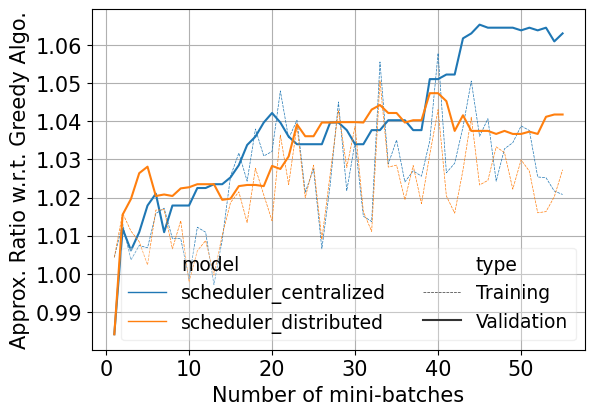

In [31]:
fig, ax = plt.subplots(1,1,sharey=True, figsize=(8, 6))
for item in ['Actor']:
    sns.lineplot(x="calls", y="ratio", hue="model", style='type', 
                 hue_order=[
#                     'Twin_cent',
                    'scheduler_centralized',
#                     'Twin_decent',
                    'scheduler_distributed',
                 ],
                 style_order=['Validation','Training'],
                 size='type',
                 sizes={'Validation':1.5,'Training':0.5},
                 data=df_tmp,
                 ci=None, ax=ax,
                 linewidth=1.0, markersize=10, 
                 palette="tab10", markers=False, dashes=True)
    
# ax.set_xlim([0, 40000])
# ax.set_xticks(np.arange(0,40000,5000))

ax.grid(True)
# ax.set_ylim([0.985, 1.075])
# ax.set_yticks(np.arange(0.99,1.07,0.01))
ax.set_xlabel("Number of mini-batches", fontsize=15)
ax.set_ylabel("Approx. Ratio w.r.t. Greedy Algo.", fontsize=15)

ax.legend(fontsize=13.5, framealpha=0.3, ncol=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.set_size_inches(5.8, 4)
fname='./output/scheduler_convergence.pdf'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.15)
# plt.subplots_adjust(left=0.11, right=0.995, top=0.995, bottom=0.115)
plt.subplots_adjust(right=0.995)
# fig.savefig(fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='pdf')